##Requirements

In [ ]:
!pip install -q kaggle
## extrernal 
# !pip install split-folders
# !pip install -q kaggle
#!pip install wandb
! pip install neptune-client==0.9.8
! pip install neptune-contrib
! pip install focal_loss
#! pip install -q tensorflow-model-optimization
! pip install scikit-plot
! pip install tensorflow neptune-client neptune-tensorflow-keras

  Using cached neptune_client-0.9.8-py2.py3-none-any.whl
  Attempting uninstall: neptune-client
    Found existing installation: neptune-client 0.10.8
    Uninstalling neptune-client-0.10.8:
      Successfully uninstalled neptune-client-0.10.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
neptune-tensorflow-keras 0.9.8 requires neptune-client>=0.10.0, but you have neptune-client 0.9.8 which is incompatible.
  Using cached neptune_client-0.10.8-py2.py3-none-any.whl
  Attempting uninstall: neptune-client
    Found existing installation: neptune-client 0.9.8
    Uninstalling neptune-client-0.9.8:
      Successfully uninstalled neptune-client-0.9.8


In [ ]:
import numpy as np

from numpy.random import uniform, normal, randint, random
np.random.seed(42)
# import tensorflow as tf
# from tensorflow.keras import layers
# from tensorflow import keras as kr
import matplotlib.pyplot as plt
from focal_loss import BinaryFocalLoss
import tempfile
import os
import scikitplot
import tensorflow as tf
 
from scikitplot.metrics import plot_confusion_matrix, plot_roc
import imgaug.augmenters as iaa
from tensorflow import keras as kr
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from skimage import transform
from PIL import Image as im
import skimage
from skimage.io import imread
from skimage.transform import resize
import skimage as ski
from skimage import filters
from skimage import exposure
from skimage.io import imsave, imread
from copy import deepcopy
from numpy import abs, cos, sin, pi
import copy



import math
import pandas as pd
import random


from glob import glob
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing import image as krs_image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import cv2  
import seaborn as sns
import shutil

##Datasets

In [ ]:
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d nih-chest-xrays/data

In [ ]:
shutil.copy("/content/drive/MyDrive/maskzip2.zip", "/content/")
shutil.copy("/content/drive/MyDrive/Data_Entry_2017.zip", "/content/")

'/content/Data_Entry_2017.zip'

In [ ]:
import zipfile
with zipfile.ZipFile("/content/maskzip2.zip","r") as zip_ref:
    zip_ref.extractall("/content/Untitled Folder4/")
with zipfile.ZipFile("/content/Data_Entry_2017.zip","r") as zip_ref:
    zip_ref.extractall("/content/")    

In [ ]:
#Download the dataset
! git clone https://github.com/ieee8023/covid-chestxray-dataset.git

fatal: destination path 'covid-chestxray-dataset' already exists and is not an empty directory.


In [ ]:
def read_img2(img_Path,dataframe1):
  imx=[]
  img_list=[]
  path = img_Path
  for imgx in os.listdir(path):

    #print(path+imgx)
    if imgx in dataframe1.index:
      imx=path+imgx
      img_list.append(imx)
  
  return img_list

In [ ]:
def read_CSV(csv_Path):
  df_22 = pd.read_csv(csv_Path)#,index_col=["filename"])
  return df_22

In [ ]:
def read_CSV2(csv_Path):
  df_22 = pd.read_csv(csv_Path)#,index_col=["Image Index"])
  return df_22

In [ ]:
def read_img(img_Path1,img_path2,dataframe1):
  imx=[]
  img_list=[]
  path1 = img_Path1
  path2 = img_path2
  for imgx in os.listdir(img_Path1):
   
    if imgx in dataframe1.index:

       imx=path1+imgx
       #shutil.copy(imx, '/content/Untitled Folder/')

       img_list.append(imx)
  # for subdir, dirs, files in os.walk(img_Path1):
    
  #   for file in files:
  #     if file in dataframe1.index:
  #       imx=subdir+"/"+file   
  #       img_list.append(imx)

  #       #shutil.copy(imx, '/content/Untitled Folder/')
  
  return img_list

In [ ]:
from sklearn.preprocessing import MinMaxScaler

cols = ["filename","age","finding","sex","view"]
#unique dises in the dataset 
# ['Pneumonia/Viral/COVID-19' 'Pneumonia/Viral/SARS' 'Pneumonia'
#  'Pneumonia/Fungal/Pneumocystis' 'Pneumonia/Bacterial/Streptococcus'
#  'No Finding' 'Pneumonia/Bacterial/Chlamydophila'
#  'Pneumonia/Bacterial/Klebsiella' 'Pneumonia/Bacterial/Legionella'
#  'Pneumonia/Lipoid' 'Pneumonia/Viral/Varicella' 'Pneumonia/Bacterial'
#  'Pneumonia/Bacterial/Mycoplasma' 'Pneumonia/Viral/Influenza'
#  'Tuberculosis' 'Pneumonia/Viral/Influenza/H1N1' 'Pneumonia/Viral/Herpes '
#  'COVID-19/Lipoid' 'Pneumonia/Fungal/Aspergillosis' 'Pneumonia/Aspiration'
#  'Pneumonia/Bacterial/Nocardia' 'Pneumonia/Bacterial/Staphylococcus/MRSA']

#disess to classify
disease = ["Pneumonia/Viral/COVID-19"]
disease_dictionary = {'Pneumonia/Viral/COVID-19': 0}




















# read data frame 
df_read =  read_CSV("/content/covid-chestxray-dataset/metadata.csv")
#df_read.age=tf.keras.utils.normalize(df_read.age.values,axis=-1, order=2 )[0]
#df_read.temperature=tf.keras.utils.normalize(df_read.age.values,axis=-1, order=2 )[0]


# bins = [0, 2, 18, 35, 65, np.inf]
# names = ['0', '1', '2', '3', '4']

# df_read['age'] = pd.cut(df_read['age'], bins, labels=names)

 

all_df = df_read

dataframe = pd.DataFrame(df_read, columns=cols)


dataframe = dataframe.loc[dataframe['view'].isin(['AP','PA'])]
dataframe = dataframe.loc[dataframe['age']> 0]
#dataframe = dataframe.loc[dataframe['temperature']> 0]
dataframe = dataframe.loc[dataframe['sex'].isin(['M','F'])]
dataframe = dataframe.loc[dataframe['finding'].isin(disease)]
#dataframe.finding = pd.Categorical(pd.factorize(dataframe.finding)[0])
dataframe['finding'] = dataframe['finding'].apply(lambda x: disease_dictionary[x])
a = {'M' : 1,'F' : 0}
dataframe['sex'] = dataframe['sex'].map(a)






# scaler = MinMaxScaler()
# train_df['age'] = scaler.fit_transform(train_df['age'].values.reshape(-1,1))
# val_df['age'] = scaler.fit_transform(val_df['age'].values.reshape(-1,1))
#tn = len(train_df)
# for index, row in train_df.iterrows():
#     if train_df.duplicated(subset='patientid', keep='first').sum() <= tn/2:
#       #print("asd")     
#       c = row.patientid
      
#       if c in val_df.patientid.values:
#         d = val_df.loc[val_df.patientid == c]
#         train_df = train_df.append(d)
        
#         delete_row =d.index
        
#         val_df = val_df.drop(delete_row)  
       
 
# for index, row in train_df.iterrows():
#     a = row.patientid
    
#     if a in val_df.patientid.values:
#        b = train_df.loc[train_df.patientid == a]
#        val_df = val_df.append(b)
       
#        delete_row =b.index
       
#        train_df = train_df.drop(delete_row) 
       


In [ ]:
from sklearn.preprocessing import MinMaxScaler

cols2 = ["Image Index","Patient Age","Finding Labels","Patient Gender","View Position"]


disease2 = ["Pneumonia"]
disease_dictionary2 = {'Pneumonia': 1}
dataframe_pen =  read_CSV2("/content/Data_Entry_2017.csv")
dataframe_pen = pd.DataFrame(dataframe_pen, columns=cols2)

# rename dataframe columns 
dataframe_pen.rename(columns={'Image Index' : 'filename' , 'Finding Labels':'finding','Patient Age':'age',
                              'Patient Gender':'sex','View Position':'view',"Patient ID":'patientid'}
                     , inplace=True)

dataframe_pen2 = dataframe_pen.loc[dataframe_pen['view'].isin(['AP','PA'])]
dataframe_pen2 = dataframe_pen.loc[dataframe_pen['age']> 0]
#dataframe_pen2 = dataframe_pen.loc[dataframe_pen['temperature']> 0]
dataframe_pen2 = dataframe_pen.loc[dataframe_pen['sex'].isin(['M','F'])]
dataframe_pen2 = dataframe_pen.loc[dataframe_pen['finding'].isin(disease2)]
#dataframe.finding = pd.Categorical(pd.factorize(dataframe.finding)[0])
dataframe_pen2['finding'] = dataframe_pen2['finding'].apply(lambda x: disease_dictionary2[x])
a = {'M' : 1,'F' : 0}
dataframe_pen2['sex'] = dataframe_pen['sex'].map(a)







/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
import shutil, os

f_dataframe = pd.concat([dataframe_pen2, dataframe], axis=0)
f_dataframe = f_dataframe.set_index('filename')
imf_dir1='/content/Untitled Folder4/'   
imf_dir2="/content/Untitled Folder4/"  
pne_dir = "/content/data2/"
### Delete some images that are to noisy or incorrect

bad_Images= ["00012834_085.png",
             "00019894_038.png",
             "article_river_de7471906e0011eabe5f9363acaf45c4-covid-cxr-2.png",
             "aqaa062i0002-b.png",
             "aqaa062i0002-a.png",
             "00022192_032.png",
             "00022192_038.png",
             "00012094_011.png",
             "00026729_000.png",
             "00001437_019.png"]
for x in bad_Images: 
  f_dataframe.drop(x)
msk = np.random.rand(len(f_dataframe)) < 0.8
train_df = f_dataframe[msk]
val_df = f_dataframe[~msk]

all_img = read_img(imf_dir2,pne_dir,f_dataframe)
train_img = read_img(imf_dir2,pne_dir,train_df)
val_img = read_img(imf_dir2,pne_dir,val_df)


In [ ]:
len(val_df.loc[val_df['finding']==1])

66

##Data Generator

In [ ]:
# Create the arguments for image preprocessing
data_gen_args = dict(
    rescale=1. / 255,
    horizontal_flip=True,
    brightness_range=[0.5, 1.5],
    channel_shift_range=50,
)
data_gen_args2 = dict(
    rescale=1. / 255,
)
seq = iaa.Sequential([
    iaa.Affine(scale=(1, 1.2)),
    #iaa.GaussianBlur(sigma=(0, 0.1)),
    iaa.Fliplr(0.5)
])
# Create an empty data generator
datagen = ImageDataGenerator()
datagen2 =  ImageDataGenerator()#preprocessing_function=seq)#.augment_image)

In [ ]:
def flip_image(imagesrc):
  c = random.choice([1,0]) 
  flipedimage = cv2.flip(imagesrc, c)

  return flipedimage

 

def add_light(imagesrc, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")

    image=cv2.LUT(imagesrc, table)
    return image


In [ ]:
# define an augmentation pipeline
aug_pipeline = iaa.Sequential([
    #iaa.Sometimes(0.5, iaa.GaussianBlur((0, 3.0))), # apply Gaussian blur with a sigma between 0 and 3 to 50% of the images
    # apply one of the augmentations: Dropout or CoarseDropout
    # iaa.OneOf([
    #     iaa.Dropout((0.01, 0.1), per_channel=0.5), # randomly remove up to 10% of the pixels
    #     iaa.CoarseDropout((0.03, 0.15), size_percent=(0.02, 0.05), per_channel=0.2),
    # ]),
    # apply from 0 to 3 of the augmentations from the list
    iaa.SomeOf((0, 3),[
        iaa.Fliplr(1.0), # horizontally flip
        iaa.Sometimes(0.5, iaa.CropAndPad(percent=(-0.15, 0.15))), # crop and pad 50% of the images
        iaa.Sometimes(0.2, iaa.Affine(rotate=5)) # rotate 50% of the images
    ])],random_order=True)

In [ ]:
def b223_generator(images_list, dataframex, batch_size,train= True,prediction=False,l1=False):
    i = 0
    while True:
         
        image1 = []
        image22 = []
        csv = []
        labels1 = []
        for b in range(batch_size):
            if i == len(images_list):
                i = 0
                random.shuffle(images_list)
            image_path = images_list[i]
            image_name = os.path.basename(image_path)
            
            csv_row = dataframex.loc[image_name, :]

       
          
            image2 = krs_image.load_img(image_path,color_mode="grayscale")
            image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
            image = skimage.transform.resize(image,
                               (256,256),
                               mode='edge',
                               anti_aliasing=False,
                               anti_aliasing_sigma=None,
                               preserve_range=True,
                               order=0)
           
            # image = image.astype(np.float32) /255
            # clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
            # image = clahe.apply(image)   
            image = np.array(image, dtype=np.uint8)
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
            
            image = clahe.apply(image)       
            image = aug_pipeline.augment_image(image)
   
            label = csv_row['finding']
            csv_features = csv_row.drop(['finding', 'view'])
           

            image1.append(image)
            
            image22.append(image)
            
            csv.append(csv_features)
            labels1.append(label)

            i += 1

        NCOMPONENTS = 20
         
        image1 = np.array(image1).astype('uint8')
        image1 = (image1 - np.min(image1))/np.ptp(image1)
        image22 = np.array(image22).astype('uint8')
        image22 = (image22 - np.min(image22))/np.ptp(image22)

        csv= np.array(csv).astype('float32')
     
        labels1 = kr.utils.to_categorical(labels1, num_classes=2)
    
        if prediction== True:
          yield [image1, image22 , csv]
        if l1== True:
          labels1
        else:
          yield [image1 ,image22 , csv], labels1

In [ ]:
def b224_generator(images_list, dataframex, batch_size,train= True,prediction=False,l1=False):
    i = 0
    while True:
         
        image1 = []
        image22 = []
        csv = []
        labels1 = []
        for b in range(batch_size):
            if i == len(images_list):
                i = 0
                random.shuffle(images_list)
            image_path = images_list[i]
            image_name = os.path.basename(image_path)
            
            csv_row = dataframex.loc[image_name, :]

       
          
            image2 = krs_image.load_img(image_path,color_mode="grayscale")
            image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
            image = skimage.transform.resize(image,
                               (256,256),
                               mode='edge',
                               anti_aliasing=False,
                               anti_aliasing_sigma=None,
                               preserve_range=True,
                               order=0)
           
            # image = image.astype(np.float32) /255
            image = np.array(image, dtype=np.uint8)

            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
            
            image = clahe.apply(image)         
            #image = aug_pipeline.augment_image(image)
   
            label = csv_row['finding']
            csv_features = csv_row.drop(['finding', 'view'])
           

            image1.append(image)
            
            image22.append(image)
            
            csv.append(csv_features)
            labels1.append(label)

            i += 1


         
        image1 = np.array(image1).astype('uint8')
        image1 = (image1 - np.min(image1))/np.ptp(image1)
        image22 = np.array(image22).astype('uint8')
        image22 = (image22 - np.min(image22))/np.ptp(image22)

        csv= np.array(csv).astype('float32')
     
        labels1 = kr.utils.to_categorical(labels1, num_classes=2)
    
        if prediction== True:
          yield [image1, image22 , csv]
        if l1== True:
          labels1
        else:
          yield [image1 ,image22 , csv], labels1

In [ ]:
x_train , y_true = next(b223_generator(val_img,val_df,len(val_df),train=False,prediction=False,l1=False))

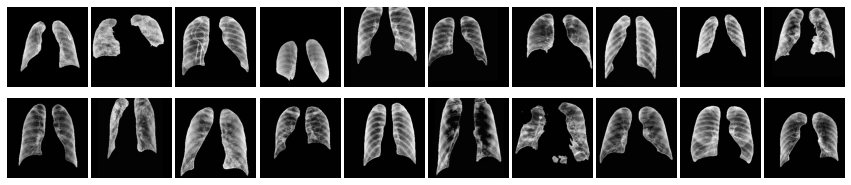

In [ ]:
from matplotlib import pyplot as plt
figure = plt.figure(figsize=(15, 10))
num_of_images = 20
plt.subplots_adjust(wspace=0.05, hspace=0.01)
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    #plt.title(y_true[index].item())
    plt.imshow(x_train[1][index].squeeze(), cmap='gray')

##NN-Model

In [ ]:
def f_model2(): 
  activ_Func= kr.activations.relu
  input1 =kr.layers.Input(shape=(256 , 256, 1))
  input2 =kr.layers.Input(shape=(256 , 256, 1))
  input3 =kr.layers.Input(shape=(2,))

  x_a = kr.layers.Conv2D(filters=32,kernel_size=(1,1),  activation=activ_Func, padding='same')(input1)

  x_a_1 = kr.layers.Conv2D(filters=32,kernel_size=(3,3),  activation=activ_Func, padding='same')(x_a)
 # x_a_1 = kr.layers.Dropout(0.1)(x_a_1)
  x_a_1 = kr.layers.MaxPooling2D(pool_size=3, padding='same')(x_a_1)
  x_a_1 = kr.layers.Conv2D(filters=64,kernel_size=(3,3),  activation=activ_Func, padding='same')(x_a_1)
  #x_a_1 = kr.layers.Dropout(0.3)(x_a_1)
  x_a_1 = kr.layers.MaxPooling2D(pool_size=3, padding='same')(x_a_1)
  x_a_1 = kr.layers.Conv2D(filters=128,kernel_size=(5,5),  activation=activ_Func, padding='same')(x_a_1)
  #x_a_1 = kr.layers.Dropout(0.3)(x_a_1)
  x_a_1 = kr.layers.MaxPooling2D(pool_size=5, padding='same')(x_a_1)


  x_a_2 = kr.layers.Conv2D(filters=32,kernel_size=(3,3),  activation=activ_Func, padding='same')(x_a)
  #x_a_2 = kr.layers.Dropout(0.1)(x_a_2)
  x_a_2 = kr.layers.MaxPooling2D(pool_size=3, padding='same')(x_a_2)
  x_a_2 = kr.layers.Conv2D(filters=64,kernel_size=(3,3),  activation=activ_Func, padding='same')(x_a_2)
  #x_a_2 = kr.layers.Dropout(0.2)(x_a_2)
  x_a_2 = kr.layers.MaxPooling2D(pool_size=3, padding='same')(x_a_2)
  x_a_2 = kr.layers.Conv2D(filters=128,kernel_size=(5,5),  activation=activ_Func, padding='same')(x_a_2)
  #x_a_2 = kr.layers.Dropout(0.2)(x_a_2)
  x_a_2 = kr.layers.MaxPooling2D(pool_size=5, padding='same')(x_a_2)
  Concatenate_a = kr.layers.Concatenate()([x_a_1, x_a_2])
  Flatten_a = kr.layers.Flatten()(Concatenate_a)
  Dense_a = kr.layers.Dense(128, activation=activ_Func)(Flatten_a)
  #dropout_a = kr.layers.Dropout(0.3)(Dense_a)
  Dense_a2 = kr.layers.Dense(64, activation=activ_Func)(Dense_a)

  x_b = kr.layers.Conv2D(filters=32,kernel_size=(1,1),  activation=activ_Func, padding='same')(input2)

  x_b_1 = kr.layers.Conv2D(filters=32,kernel_size=(3,3),  activation=activ_Func, padding='same')(x_b)
  #x_b_1 = kr.layers.Dropout(0.1)(x_b_1)
  x_b_1 = kr.layers.MaxPooling2D(pool_size=3, padding='same')(x_b_1)
  x_b_1 = kr.layers.Conv2D(filters=64,kernel_size=(3,3),  activation=activ_Func, padding='same')(x_b_1)
  #x_b_1 = kr.layers.Dropout(0.2)(x_b_1)
  x_b_1 = kr.layers.MaxPooling2D(pool_size=3, padding='same')(x_b_1)
  x_b_1 = kr.layers.Conv2D(filters=64,kernel_size=(5,5),  activation=activ_Func, padding='same')(x_b_1)
  #x_b_1 = kr.layers.Dropout(0.2)(x_b_1)
  x_b_1 = kr.layers.MaxPooling2D(pool_size=5, padding='same')(x_b_1)


  x_b_2 = kr.layers.Conv2D(filters=32,kernel_size=(3,3),  activation=activ_Func, padding='same')(x_b)
  #x_b_2 = kr.layers.Dropout(0.1)(x_b_2)
  x_b_2 = kr.layers.MaxPooling2D(pool_size=3, padding='same')(x_b_2)
  x_b_2 = kr.layers.Conv2D(filters=64,kernel_size=(3,3),  activation=activ_Func, padding='same')(x_b_2)
  #x_b_2 = kr.layers.Dropout(0.2)(x_b_2)
  x_b_2 = kr.layers.MaxPooling2D(pool_size=3, padding='same')(x_b_2)
  x_b_2 = kr.layers.Conv2D(filters=64,kernel_size=(5,5),  activation=activ_Func, padding='same')(x_b_2)
  #x_b_2 = kr.layers.Dropout(0.2)(x_b_2)
  x_b_2 = kr.layers.MaxPooling2D(pool_size=5, padding='same')(x_b_2)
  Concatenate_b = kr.layers.Concatenate()([x_b_1, x_b_2])
  Flatten_b = kr.layers.Flatten()(Concatenate_b)
  Dense_b = kr.layers.Dense(128, activation=activ_Func)(Flatten_b)
  #dropout_b = kr.layers.Dropout(0.3)(Dense_b)
  Dense_b2 = kr.layers.Dense(64, activation=activ_Func)(Dense_b)


  Concatenate_c = kr.layers.concatenate([Dense_a2, Dense_b2])
  # Dense_c = kr.layers.Dense(265, activation=activ_Func)(Concatenate_c)
  # #dropout_c = kr.layers.Dropout(0.1)(Dense_c)
  # Dense_c2 = kr.layers.Dense(128, activation=activ_Func)(Dense_c)

  ### MLP ###
  x_mlp = kr.layers.Dense(16,activation=activ_Func)(input3)
  x_mlp = kr.layers.Dense(8, activation=activ_Func)(x_mlp)
  x_mlp = kr.layers.Dense(2, activation="linear")(x_mlp)


  ### Final ###
  Concatenate2 = kr.layers.Concatenate()([x_mlp, Concatenate_c])
  Dense1 = kr.layers.Dense(64, activation=activ_Func)(Concatenate2)
  Dense1 = kr.layers.Dense(128, activation=activ_Func)(Dense1)
  Dense2 = kr.layers.Dense(2, activation="softmax")(Dense1)
  Model_c = kr.models.Model(inputs=[input1,input2,input3], outputs=Dense2)
  lr_schedule = kr.optimizers.schedules.ExponentialDecay(
      initial_learning_rate=1e-3,
      decay_steps=900,
      decay_rate=0.5)
  opt = kr.optimizers.Adam(learning_rate=lr_schedule)# ,beta_1=0.9)
  Model_c.compile(loss =BinaryFocalLoss(gamma=2), optimizer = opt, metrics=METRICS)
  return Model_c 

In [ ]:
# def f_model3(): 
#   activ_Func= kr.activations.relu
#   input1 =kr.layers.Input(shape=(256 , 256, 1))
#   input2 =kr.layers.Input(shape=(256 , 256, 1))
#   input3 =kr.layers.Input(shape=(2,))
# #######################################################################################################
#   x_a = kr.layers.Conv2D(filters=32,kernel_size=(1,1),  activation=activ_Func, padding='same')(input1)
# #######################################################################################################
#   x_a_1 = kr.layers.Conv2D(filters=32,kernel_size=(3,3),  activation=activ_Func, padding='same')(x_a)
#   x_a_1 = kr.layers.MaxPooling2D(pool_size=2, padding='same')(x_a_1)
#   x_a_1 = kr.layers.Conv2D(filters=64,kernel_size=(3,3),  activation=activ_Func, padding='same')(x_a_1)
#   x_a_1 = kr.layers.MaxPooling2D(pool_size=2, padding='same')(x_a_1)
#   x_a_1 = kr.layers.Conv2D(filters=64,kernel_size=(5,5),  activation=activ_Func, padding='same')(x_a_1)
#   x_a_1 = kr.layers.MaxPooling2D(pool_size=2, padding='same')(x_a_1)
# #######################################################################################################
#   x_a_2 = kr.layers.Conv2D(filters=32,kernel_size=(3,3),  activation=activ_Func, padding='same')(x_a)
#   x_a_2 = kr.layers.MaxPooling2D(pool_size=2, padding='same')(x_a_2)
#   x_a_2 = kr.layers.Conv2D(filters=64,kernel_size=(3,3),  activation=activ_Func, padding='same')(x_a_2)
#   x_a_2 = kr.layers.MaxPooling2D(pool_size=2, padding='same')(x_a_2)
#   x_a_2 = kr.layers.Conv2D(filters=64,kernel_size=(5,5),  activation=activ_Func, padding='same')(x_a_2)
#   x_a_2 = kr.layers.MaxPooling2D(pool_size=2, padding='same')(x_a_2)
#   Concatenate_a = kr.layers.Concatenate()([x_a_1, x_a_2])
#   Flatten_a = kr.layers.Flatten()(Concatenate_a)
#   branchA =kr.models.Model(inputs=input1, outputs=Flatten_a)
# #######################################################################################################
# #######################################################################################################
# #######################################################################################################
# #######################################################################################################
#   x_b = kr.layers.Conv2D(filters=32,kernel_size=(1,1),  activation=activ_Func, padding='same')(input2)
# #######################################################################################################
#   x_b_1 = kr.layers.Conv2D(filters=32,kernel_size=(3,3),  activation=activ_Func, padding='same')(x_b)
#   x_b_1 = kr.layers.MaxPooling2D(pool_size=2, padding='same')(x_b_1)
#   x_b_1 = kr.layers.Conv2D(filters=64,kernel_size=(3,3),  activation=activ_Func, padding='same')(x_b_1)
#   x_b_1 = kr.layers.MaxPooling2D(pool_size=2, padding='same')(x_b_1)
#   x_b_1 = kr.layers.Conv2D(filters=64,kernel_size=(5,5),  activation=activ_Func, padding='same')(x_b_1)
#   x_b_1 = kr.layers.MaxPooling2D(pool_size=2, padding='same')(x_b_1)
# #######################################################################################################
#   x_b_2 = kr.layers.Conv2D(filters=32,kernel_size=(3,3),  activation=activ_Func, padding='same')(x_b)
#   x_b_2 = kr.layers.MaxPooling2D(pool_size=2, padding='same')(x_b_2)
#   x_b_2 = kr.layers.Conv2D(filters=64,kernel_size=(3,3),  activation=activ_Func, padding='same')(x_b_2)
#   x_b_2 = kr.layers.MaxPooling2D(pool_size=2, padding='same')(x_b_2)
#   x_b_2 = kr.layers.Conv2D(filters=64,kernel_size=(5,5),  activation=activ_Func, padding='same')(x_b_2)
#   x_b_2 = kr.layers.MaxPooling2D(pool_size=2, padding='same')(x_b_2)
#   concatenate_b = kr.layers.Concatenate()([x_b_1, x_b_2])
#   Flatten_b = kr.layers.Flatten()(concatenate_b)

#   branchB = kr.models.Model(inputs=input2, outputs=Flatten_b)
# #######################################################################################################



 
 

#   ### MLP ###
#   x_mlp = kr.layers.Dense(16,activation=activ_Func)(input3)
#   x_mlp = kr.layers.Dense(8, activation=activ_Func)(x_mlp)
#   x_mlp = kr.layers.Dense(2, activation="linear")(x_mlp)
#   branchC = kr.models.Model(inputs=input3, outputs=x_mlp)

#   combined =  kr.layers.concatenate([branchA.output, branchB.output,branchC.output])
#   ### Final ###
#   #Concatenate2 = kr.layers.Concatenate()([x_mlp, Dense_c2])
#   Dense1 = kr.layers.Dense(32, activation=activ_Func)(combined)
#   Dense1 = kr.layers.Dense(32, activation=activ_Func)(Dense1)
#   Dense2 = kr.layers.Dense(2, activation="softmax")(Dense1)
#   Model_c = kr.models.Model(inputs=[input1,input2,input3], outputs=Dense2)
  
#   lr_schedule = kr.optimizers.schedules.ExponentialDecay(
#       initial_learning_rate=1e-3,
#       decay_steps=100,
#       decay_rate=0.9)
#   opt = kr.optimizers.Adam(learning_rate=0.0001)# ,beta_1=0.9)
#   #Model_c.compile(loss =BinaryFocalLoss(gamma=2), optimizer = opt, metrics=METRICS)
#   Model_c.compile(loss = kr.losses.binary_crossentropy, optimizer = opt, metrics=METRICS)
#   return Model_c 

In [ ]:
METRICS = [
      kr.metrics.TruePositives(name='tp'),
      kr.metrics.FalsePositives(name='fp'),
      kr.metrics.TrueNegatives(name='tn'),
      kr.metrics.FalseNegatives(name='fn'), 
      kr.metrics.BinaryAccuracy(name='accuracy'),
      kr.metrics.Precision(name='precision'),
      kr.metrics.Recall(name='recall'),
      kr.metrics.AUC(name='auc'),
]

In [ ]:
kr.backend.clear_session()
basemodel = f_model2()
batch_size=8
train_steps = len(train_df)//batch_size
val_steps =  len(val_df)//batch_size


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint('model-.h5', 
                                                               verbose=1,
                                                               monitor='val_accuracy',
                                                               save_best_only=True,
                                                               mode='auto')

a = b223_generator(train_img,train_df,batch_size,train=True,prediction=False,l1=False)
b = b224_generator(val_img,val_df, batch_size,train=False,prediction=False,l1=False)
basemodel.fit(a,
          epochs=500,
          steps_per_epoch=train_steps,
          validation_data=(b),validation_steps=val_steps,callbacks=[model_checkpoint_callback])

##Optimization

###Objective function

In [ ]:
def objv5(solution=None ,OP_layer=None):
  #kr.backend.clear_session()
  weights_matrix = []
  start = 0
  
  #modelx.load_weights('beforeEAEO.h5')
  kr.backend.clear_session()
  model_obj =kr.models.load_model("my_model")
  ##enumerate model layers and find the required layers to optimize 
  for layer_idx, layer in enumerate(model_obj.layers):
    if isinstance(layer, kr.layers.Conv2D) and layer.trainable :
      if OP_layer.name == layer.name:
         
        layer_weights = layer.get_weights()
        for l_weights in layer_weights:
            layer_weights_shape = l_weights.shape
            layer_weights_size = l_weights.size

            layer_weights_vector = solution[start:start + layer_weights_size]
            layer_weights_matrix = np.reshape(layer_weights_vector, newshape=(layer_weights_shape))
            weights_matrix.append(layer_weights_matrix)
            
            start = start + layer_weights_size
           
        model_obj.get_layer(layer.name).set_weights(weights_matrix)
        print(layer.name)
        print(OP_layer.name)
  
 
  y_pred = model_obj.predict(x_train2) 
  y_pred = np.around(y_pred)
  ca = kr.metrics.Accuracy()
  ca.update_state(y_train2, y_pred)
  accuracy = ca.result().numpy()
  print("temp Fitness: {}".format(accuracy))
  return accuracy

###ROOT

In [ ]:
def setweights( solution=None):
  weights_matrix = []

  start = 0
  for layer_idx, layer in enumerate(model.layers): # model.get_weights():

   if isinstance(layer, kr.layers.Conv2D):
      layer_weights = layer.get_weights()
      if layer.trainable:
          for l_weights in layer_weights:
              layer_weights_shape = l_weights.shape
              layer_weights_size = l_weights.size
      
              layer_weights_vector = solution[start:start + layer_weights_size]
              layer_weights_matrix = np.reshape(layer_weights_vector, newshape=(layer_weights_shape))
              weights_matrix.append(layer_weights_matrix)
              
              start = start + layer_weights_size
          layer.set_weights(weights_matrix)
          weights_matrix = []
 

In [ ]:
#!/usr/bin/env python
# ------------------------------------------------------------------------------------------------------%
# Created by "Thieu Nguyen" at 08:58, 16/03/2020                                                        %
#                                                                                                       %
#       Email:      nguyenthieu2102@gmail.com                                                           %
#       Homepage:   https://www.researchgate.net/profile/Thieu_Nguyen6                                  %
#       Github:     https://github.com/thieu1995                                                  %
# -------------------------------------------------------------------------------------------------------%

from numpy import where, clip, logical_and, maximum, minimum, power, sin, abs, pi, sqrt, sign, ones, ptp, min, sum, array, ceil, multiply, mean
# from numpy.random import uniform, random, normal, choice
from math import gamma
from copy import deepcopy


class Root:
  """ This is root of all Algorithms """

  ID_MIN_PROB = 0  # min problem
  ID_MAX_PROB = -1  # max problem

  ID_POS = 0  # Position
  ID_FIT = 1  # Fitness

  EPSILON = 10E-10

  DEFAULT_BATCH_IDEA = False
  DEFAULT_BATCH_SIZE = 10
  DEFAULT_LB = -1
  DEFAULT_UB = 1

  def __init__(self, obj_func=None, lb=None, ub=None, verbose=True, kwargs=None):
      """
      Parameters
      ----------
      obj_func : function
      lb : list
      ub : list
      verbose : bool
      """
      if kwargs is None:
          kwargs = {}
      self.verbose = verbose
      self.obj_func = obj_func
      self.__check_parameters__(lb, ub, kwargs)
      self.__check_optional_parameters__(kwargs)
      self.epoch, self.pop_size = None, None
      self.solution, self.loss_train = None, []

  def __check_parameters__(self, lb, ub, kwargs):
      if (lb is None) or (ub is None):
          if "problem_size" in kwargs:
              print(f"Default lb={self.DEFAULT_LB}, ub={self.DEFAULT_UB}.")
              self.problem_size = self.__check_problem_size__(kwargs["problem_size"])
              self.lb = self.DEFAULT_LB * ones(self.problem_size)
              self.ub = self.DEFAULT_UB * ones(self.problem_size)
          else:
              print("If lb, ub are undefined, then you must set problem size to be an integer.")
              exit(0)
      else:
          if isinstance(lb, list) and isinstance(ub, list):
              if len(lb) == len(ub):
                  if len(lb) == 0:
                      if "problem_size" in kwargs:
                          print(f"Default lb={self.DEFAULT_LB}, ub={self.DEFAULT_UB}.")
                          self.problem_size = self.__check_problem_size__(kwargs["problem_size"])
                          self.lb = self.DEFAULT_LB * ones(self.problem_size)
                          self.ub = self.DEFAULT_UB * ones(self.problem_size)
                      else:
                          print("Wrong lower bound and upper bound parameters.")
                          exit(0)
                  elif len(lb) == 1:
                      if "problem_size" in kwargs:
                          self.problem_size = self.__check_problem_size__(kwargs["problem_size"])
                          self.lb = lb[0] * ones(self.problem_size)
                          self.ub = ub[0] * ones(self.problem_size)
                  else:
                      self.problem_size = len(lb)
                      self.lb = array(lb)
                      self.ub = array(ub)
              else:
                  print("Lower bound and Upper bound need to be same length")
                  exit(0)
          elif type(lb) in [int, float] and type(ub) in [int, float]:
              self.problem_size = self.__check_problem_size__(kwargs["problem_size"])
              self.lb = lb * ones(self.problem_size)
              self.ub = ub * ones(self.problem_size)
          else:
              print("Lower bound and Upper bound need to be a list.")
              exit(0)

  def __check_problem_size__(self, problem_size):
      if problem_size is None:
          print("Problem size must be an int number")
          exit(0)
      elif problem_size <= 0:
          print("Problem size must > 0")
          exit(0)
      return int(ceil(problem_size))

  def __check_optional_parameters__(self, kwargs):
      if "batch_idea" in kwargs:
          batch_idea = kwargs["batch_idea"]
          if type(batch_idea) == bool:
              self.batch_idea = batch_idea
          else:
              self.batch_idea = self.DEFAULT_BATCH_IDEA
          if "batch_size" in kwargs:
              batch_size = kwargs["batch_size"]
              if type(batch_size) == int:
                  self.batch_size = batch_size
              else:
                  self.batch_size = self.DEFAULT_BATCH_SIZE
          else:
              self.batch_size = self.DEFAULT_BATCH_SIZE
      else:
          self.batch_idea = self.DEFAULT_BATCH_IDEA

  def create_solution(self, minmax=0):
      """ Return the position position with 2 element: position of position and fitness of position

      Parameters
      ----------
      minmax
          0 - minimum problem, else - maximum problem

      """
      position = uniform(self.lb, self.ub)
      fitness = self.get_fitness_position(position=position, minmax=minmax)
      return [position, fitness]

  def get_fitness_position(self, position=None,layertooptimize=None):
      """     Assumption that objective function always return the original value
      :param position: 1-D numpy array
      :param minmax: 0- min problem, 1 - max problem
      :return:
      """
      return self.obj_func(position,layertooptimize) #if minmax == 0 else 1.0 / (self.obj_func(position) + self.EPSILON)
  def get_fitness_position2(self, position=None,layertooptimize=None):
      """     Assumption that objective function always return the original value
      :param position: 1-D numpy array
      :param minmax: 0- min problem, 1 - max problem
      :return:
      """
      return self.obj_func(position,layertooptimize,) #if minmax == 0 else 1.0 / (self.obj_func(position) + self.EPSILON)     

  def get_fitness_solution(self, solution=None, minmax=0):
      return self.get_fitness_position(solution[self.ID_POS], minmax)

  def get_global_best_solution(self, pop=None, id_fit=None, id_best=None):
      """ Sort a copy of population and return the copy of the best position """
      sorted_pop = sorted(pop, key=lambda temp: temp[id_fit])
      return deepcopy(sorted_pop[id_best])

  def get_global_best_global_worst_solution(self, pop=None, id_fit=None, id_best=None):
      sorted_pop = sorted(pop, key=lambda temp: temp[id_fit])
      if id_best == self.ID_MIN_PROB:
          return deepcopy(sorted_pop[id_best]), deepcopy(sorted_pop[self.ID_MAX_PROB])
      elif id_best == self.ID_MAX_PROB:
          return deepcopy(sorted_pop[id_best]), deepcopy(sorted_pop[self.ID_MIN_PROB])

  def update_global_best_global_worst_solution(self, pop=None, id_best=None, id_worst=None, g_best=None):
      """ Sort the copy of population and update the current best position. Return the new current best position """
      sorted_pop = sorted(pop, key=lambda temp: temp[self.ID_FIT])
      current_best = sorted_pop[id_best]
      g_best = deepcopy(current_best) if current_best[self.ID_FIT] < g_best[self.ID_FIT] else deepcopy(g_best)
      return g_best, sorted_pop[id_worst]

  def get_sorted_pop_and_global_best_solution(self, pop=None, id_fit=None, id_best=None):
      """ Sort population and return the sorted population and the best position """
      sorted_pop = sorted(pop, key=lambda temp: temp[id_fit])
      return sorted_pop, deepcopy(sorted_pop[id_best])

  def amend_position(self, position=None):
      return maximum(self.lb, minimum(self.ub, position))

  def amend_position_faster(self, position=None):
      return clip(position, self.lb, self.ub)

  def activ_ReLu(self, position=None):
      return maximum(0,position)

  def amend_position_random(self, position=None):
      for t in range(self.problem_size):
          if position[t] < self.lb[t] or position[t] > self.ub[t]:
              position[t] = uniform(self.lb[t], self.ub[t])
      return position

  def amend_position_random_faster(self, position=None):
      return where(logical_and(self.lb <= position, position <= self.ub), position, uniform(self.lb, self.ub))

  def update_global_best_solution(self, pop=None, id_best=None, g_best=None):
      """ Sort the copy of population and update the current best position. Return the new current best position """
      sorted_pop = sorted(pop, key=lambda temp: temp[self.ID_FIT])
      current_best = sorted_pop[id_best]
      return deepcopy(current_best) if current_best[self.ID_FIT] < g_best[self.ID_FIT] else deepcopy(g_best)

  def update_sorted_population_and_global_best_solution(self, pop=None, id_best=None, g_best=None):
      """ Sort the population and update the current best position. Return the sorted population and the new current best position """
      sorted_pop = sorted(pop, key=lambda temp: temp[self.ID_FIT])
      current_best = sorted_pop[id_best]
      g_best = deepcopy(current_best) if current_best[self.ID_FIT] < g_best[self.ID_FIT] else deepcopy(g_best)
      return sorted_pop, g_best

  def create_opposition_position(self, position=None, g_best=None):
      return self.lb + self.ub - g_best[self.ID_POS] + uniform() * (g_best[self.ID_POS] - position)

  def levy_flight(self, epoch=None, position=None, g_best_position=None, step=0.001, case=0):
      """
      Parameters
      ----------
      epoch (int): current iteration
      position : 1-D numpy array
      g_best_position : 1-D numpy array
      step (float, optional): 0.001
      case (int, optional): 0, 1, 2

      """
      beta = 1
      # muy and v are two random variables which follow normal distribution
      # sigma_muy : standard deviation of muy
      sigma_muy = power(gamma(1 + beta) * sin(pi * beta / 2) / (gamma((1 + beta) / 2) * beta * power(2, (beta - 1) / 2)), 1 / beta)
      # sigma_v : standard deviation of v
      sigma_v = 1
      muy = normal(0, sigma_muy ** 2)
      v = normal(0, sigma_v ** 2)
      s = muy / power(abs(v), 1 / beta)
      levy = uniform(self.lb, self.ub) * step * s * (position - g_best_position)

      if case == 0:
          return levy
      elif case == 1:
          return position + 1.0 / sqrt(epoch + 1) * sign(random() - 0.5) * levy
      elif case == 2:
          return position + normal(0, 1, len(self.lb)) * levy
      elif case == 3:
          return position + 0.01 * levy

  def levy_flight_2(self, position=None, g_best_position=None):
      alpha = 0.01
      xichma_v = 1
      xichma_u = ((gamma(1 + 1.5) * sin(pi * 1.5 / 2)) / (gamma((1 + 1.5) / 2) * 1.5 * 2 ** ((1.5 - 1) / 2))) ** (1.0 / 1.5)
      levy_b = (normal(0, xichma_u ** 2)) / (sqrt(abs(normal(0, xichma_v ** 2))) ** (1.0 / 1.5))
      return position + alpha * levy_b * (position - g_best_position)

  def step_size_by_levy_flight(self, multiplier=0.001, beta=1.0, case=0):
      """
      Parameters
      ----------
      multiplier (float, optional): 0.01
      beta: [0-2]
          + 0-1: small range --> exploit
          + 1-2: large range --> explore
      case: 0, 1, -1
          + 0: return multiplier * s * uniform()
          + 1: return multiplier * s * normal(0, 1)
          + -1: return multiplier * s
      """
      # u and v are two random variables which follow normal distribution
      # sigma_u : standard deviation of u
      sigma_u = power(gamma(1 + beta) * sin(pi * beta / 2) / (gamma((1 + beta) / 2) * beta * power(2, (beta - 1) / 2)), 1 / beta)
      # sigma_v : standard deviation of v
      sigma_v = 1
      u = normal(0, sigma_u ** 2)
      v = normal(0, sigma_v ** 2)
      s = u / power(abs(v), 1 / beta)
      if case == 0:
          step = multiplier * s * uniform()
      elif case == 1:
          step = multiplier * s * normal(0, 1)
      else:
          step = multiplier * s
      return step

  def get_index_roulette_wheel_selection(self, list_fitness=None):
      """ It can handle negative also. Make sure your list fitness is 1D-numpy array"""
      scaled_fitness = (list_fitness - min(list_fitness)) / (ptp(list_fitness) + self.EPSILON)
      minimized_fitness = 1.0 - scaled_fitness
      total_sum = sum(minimized_fitness)
      r = uniform(low=0, high=total_sum)
      for idx, f in enumerate(minimized_fitness):
          r = r + f
          if r > total_sum:
              return idx

  def get_parent_kway_tournament_selection(self, pop=None, k_way=0.2, output=2):
      if 0 < k_way < 1:
          k_way = int(k_way * len(pop))
      list_id = choice(range(len(pop)), k_way, replace=False)
      list_parents = [pop[i] for i in list_id]
      list_parents = sorted(list_parents, key=lambda temp: temp[self.ID_FIT])
      return list_parents[:output]

  ### Crossover
  def crossover_arthmetic_recombination(self, dad_pos=None, mom_pos=None):
      r = uniform()           # w1 = w2 when r =0.5
      w1 = multiply(r, dad_pos) + multiply((1 - r), mom_pos)
      w2 = multiply(r, mom_pos) + multiply((1 - r), dad_pos)
      return w1, w2

  ### Mutation
  ### This method won't be used in any algorithm because of it's slow performance
  ### Using numpy vector for faster performance
  def mutation_flip_point(self, parent_pos, idx):
      w = deepcopy(parent_pos)
      w[idx] = uniform(self.lb[idx], self.ub[idx])
      return w


  #### Improved techniques can be used in any algorithms: 1
  ## Based on this paper: An efficient equilibrium optimizer with mutation strategy for numerical optimization (but still different)
  ## This scheme used after the original and including 4 step:
  ##  s1: sort population, take p1 = 1/2 best population for next round
  ##  s2: do the mutation for p1, using greedy method to select the better solution
  ##  s3: do the search mechanism for p1 (based on global best solution and the updated p1 above), to make p2 population
  ##  s4: construct the new population for next generation
  def improved_ms(self, pop=None, g_best=None):    ## m: mutation, s: search
      pop_len = int(len(pop) / 2)
      ## Sort the updated population based on fitness
      pop = sorted(pop, key=lambda item: item[self.ID_FIT])
      pop_s1, pop_s2 = pop[:pop_len], pop[pop_len:]
      ## Mutation scheme
      for i in range(0, pop_len):
          pos_new = pop_s1[i][self.ID_POS] * (1 + normal(0, 1, self.problem_size))
          fit = self.get_fitness_position(pos_new)
          if fit < pop_s1[i][self.ID_FIT]:        ## Greedy method --> improved exploitation
              pop_s1[i] = [pos_new, fit]
      ## Search Mechanism
      pos_s1_list = [item[self.ID_POS] for item in pop_s1]
      pos_s1_mean = mean(pos_s1_list, axis=0)
      for i in range(0, pop_len):
          pos_new = (g_best[self.ID_POS] - pos_s1_mean) - random() * (self.lb + random() * (self.ub - self.lb))
          fit = self.get_fitness_position(pos_new)
          pop_s2[i] = [pos_new, fit]              ## Keep the diversity of populatoin and still improved the exploration

      ## Construct a new population
      pop = pop_s1 + pop_s2
      pop, g_best = self.update_sorted_population_and_global_best_solution(pop, self.ID_MIN_PROB, g_best)
      return pop, g_best

  def train(self):
      pass


###Modifed EAEO

In [ ]:
from numpy.random import random as rn

In [ ]:

# ------------------------------------------------------------------------------------------------------%
# Modifed version"Thieu Nguyen" at 08:58, 16/03/2020                                                        %
#                                                                                                       %
#       Email:      nguyenthieu2102@gmail.com                                                           %
#       Homepage:   https://www.researchgate.net/profile/Thieu_Nguyen6                                  %
#       Github:     https://github.com/thieu1995                                                  %
# -------------------------------------------------------------------------------------------------------%

class EAA6(Root):
  from numpy.random import uniform, normal, randint, random
  from numpy import abs, cos, sin, pi
  from copy import deepcopy  
  from numpy.random import random as rn

  def __init__(self, obj_func=None, lb=None, ub=None,problem=None, verbose=True, epoch=750, pop_size=100, **kwargs):
      super().__init__(obj_func, lb, ub, verbose, kwargs)
      self.epoch = epoch
      self.pop_size = pop_size
      self.problem = problem
      self.firstrun =True

  
  def model_weights_as_vector(self, model):
      weights_vector = []

      
      layer_weights = model.get_weights()
      for l_weights in layer_weights:
          vector = np.reshape(l_weights, newshape=(l_weights.size))
          weights_vector.extend(vector)

      return np.array(weights_vector) 




  def create_solution2(self, sloutionx):
     
    if self.firstrun : 
       position = copy.deepcopy(sloutionx)
       position = np.array(position)
       self.firstrun=False
    else: 
      position = copy.deepcopy(sloutionx)
      position = np.array(position) + np.random.uniform(low=-0.5, high=0.5, size=len(sloutionx))

    fitness = self.get_fitness_position2(position=position,layertooptimize = self.problem  )
    return [position, fitness]

  def train(self):
      weights_vector = self.model_weights_as_vector(model=self.problem)
      pop=[]
      pop = [self.create_solution2(sloutionx = weights_vector) for _ in range(self.pop_size)]
     # pop = [self.create_solution2(sloutionx = self.problem) for _ in range(self.pop_size)]      # Sorted population in the descending order of the function fitness value
      pop = sorted(pop, key=lambda item: item[self.ID_FIT])#, reverse=False)
      g_best = deepcopy(pop[self.ID_MAX_PROB])

      pop_new = deepcopy(pop)
      self.firstrun =True
      for epoch in range(self.epoch):
          ## Production
          # Eq. 13
          a = 2* (1 - (epoch+1) / self.epoch)
          x1 = (1 - a) * pop[self.ID_MAX_PROB][self.ID_POS] + a * uniform(self.lb, self.ub)
          fit = self.get_fitness_position(x1, self.problem)
          pop_new[0] = [x1, fit]

          ## Consumption
          for i in range(2, self.pop_size):
              rand = uniform()
              old_position = pop[i][self.ID_POS]
             
             
              v1 = normal(0, 1)
              v2 = normal(0, 1)
              c = 0.5 * v1 / abs(v2)  # Consumption factor
            
            
              r3 = 2*pi*rn()
              r4 = rn()

              j = randint(1, i)
              ### Herbivore
              if rand <= 1.0 / 3:  
                
                  if r4 <= 0.5:
                      x_t1 = old_position + sin(r3) * c * (old_position - pop[0][self.ID_POS])
                  else:
                      x_t1 = old_position + cos(r3) * c * (old_position - pop[0][self.ID_POS])
              ### Carnivore
              elif 1.0 / 3 <= rand and rand <= 2.0 / 3:  
                
                  if r4 <= 0.5:
                      x_t1 = old_position + sin(r3) * c * (old_position - pop[j][self.ID_POS])
                  else:
                      x_t1 = old_position + cos(r3) * c * (old_position - pop[j][self.ID_POS])
              ### Omnivore
              else:             
                
                  r5 = rn()
                  if r4 <= 0.5:
                      x_t1 = old_position + sin(r5) * c * (r5 * (old_position - pop[0][self.ID_POS]) + (1 - r5) * (old_position - pop[j][self.ID_POS]))
                  else:
                      x_t1 = old_position + cos(r5) * c * (r5 * (old_position - pop[0][self.ID_POS]) + (1 - r5) * (old_position - pop[j][self.ID_POS]))
              x_t1 = self.amend_position_faster(x_t1)
              fit_t1 = self.get_fitness_position2(x_t1,layertooptimize = self.problem)
              pop_new[i] = [x_t1, fit_t1]
              x_t1= 0 
          for i in range(0, self.pop_size):
              if pop_new[i][self.ID_FIT] > pop[i][self.ID_FIT]:
                  pop[i] = deepcopy(pop_new[i])

          ## find current best used in decomposition
          best = self.get_global_best_solution(pop, self.ID_FIT, self.ID_MAX_PROB)

          ## Decomposition

          for i in range(0, self.pop_size):
              r3 = uniform()
              d = 3 * normal(0, 1)
              e = r3 * randint(1, 3) - 1
              h = 2 * r3 - 1
              x_new = best[self.ID_POS] + d * (e * best[self.ID_POS] - h * pop[i][self.ID_POS])
              if uniform() < 0.5:
                  beta = 1 - (1 - 0) * ((epoch + 1) / self.epoch)  # Eq. 21
                  x_r = pop[randint(0, self.pop_size)][self.ID_POS]
                  if uniform() < 0.5:
                      x_new = beta * x_r + (1 - beta) * pop[i][self.ID_POS]
                  else:
                      x_new = beta * pop[i][self.ID_POS] + (1 - beta) * x_r
              else:
                  best[self.ID_POS] = best[self.ID_POS] + normal() * best[self.ID_POS]
              x_new = self.amend_position_faster(x_new)
              fit_new = self.get_fitness_position2(x_new,layertooptimize = self.problem)
              pop_new[i] = [x_new, fit_new]

          for i in range(0, self.pop_size):
              if pop_new[i][self.ID_FIT] > pop[i][self.ID_FIT]:
                  pop[i] = deepcopy(pop_new[i])

          pop = sorted(pop, key=lambda item: item[self.ID_FIT], reverse=False)
         
         
          current_best = deepcopy(pop[self.ID_MAX_PROB])


          if current_best[self.ID_FIT] > g_best[self.ID_FIT]:
              g_best = deepcopy(current_best)
              self.loss_train.append(g_best[self.ID_FIT])
          if self.verbose:
              print("> Epoch: {}, Best fit: {}".format(epoch + 1, g_best[self.ID_FIT]))
          current_best= 0
      self.solution = g_best
      return g_best[self.ID_POS], g_best[self.ID_FIT], self.loss_train


##Running the  optimiztion

In [ ]:

basemodel.save("my_model")

INFO:tensorflow:Assets written to: my_model/assets


In [ ]:
x_train2 , y_train2 = next(b223_generator(train_img,train_df,len(train_img),train=False,prediction=False,l1=False))

In [ ]:
kr.backend.clear_session()
weights_vector = []
start = 0
modelx = f_model2()
modelx.load_weights('BbeforeEAEO.h5')
modelx.save("my_model")
for layer_idx, layer in enumerate(modelx.layers): # model.get_weights():
 
  

  if isinstance(layer, kr.layers.Conv2D) and layer.trainable :
    layer_weights = layer.get_weights()

     
    for l_weights in layer_weights:

        vector = np.reshape(l_weights, newshape=(l_weights.size))
        weights_vector.extend(vector)
    obj_func = objv5
    problemSize = len(weights_vector)

    verbose = True
    epoch = 5
    pop_size = 5
    lb = -1
    ub = 1   
    print("layer name EAEO: {}".format(layer.name))
    a = EAA6(obj_func, lb, ub ,layer,verbose, epoch, pop_size, problem_size=problemSize)
    best_pos1, best_fit1, list_loss1 = a.train()   



    weights_matrix = []
    start= 0 
    for l_weights in layer_weights:
        layer_weights_shape = l_weights.shape
        layer_weights_size = l_weights.size

        layer_weights_vector = best_pos1[start:start + layer_weights_size]
        layer_weights_matrix = np.reshape(layer_weights_vector, newshape=(layer_weights_shape))
        weights_matrix.append(layer_weights_matrix)
        
        start = start + layer_weights_size
    kr.backend.clear_session()
    modelx =kr.models.load_model("my_model")

    modelx =  kr.models.load_model("my_model") 
    modelx.get_layer(layer.name).set_weights(weights_matrix)
    modelx.save("my_model")
    weights_matrix = []
    weights_vector=[]
    x_train2 , y_train2 = next(b223_generator(train_img,train_df,len(train_img),train=False,prediction=False,l1=False))




INFO:tensorflow:Assets written to: my_model/assets
layer name EAEO: conv2d
conv2d
conv2d
temp Fitness: 0.9532294273376465
conv2d
conv2d
temp Fitness: 0.9198217988014221
conv2d
conv2d
temp Fitness: 0.9198217988014221
conv2d
conv2d
temp Fitness: 0.9131402969360352
conv2d
conv2d
temp Fitness: 0.9175946712493896
conv2d
conv2d
temp Fitness: 0.832962155342102
conv2d
conv2d
temp Fitness: 0.9153674840927124
conv2d
conv2d
temp Fitness: 0.8997772932052612
conv2d
conv2d
temp Fitness: 0.9109131693840027
conv2d
conv2d
temp Fitness: 0.9086859822273254
conv2d
conv2d
temp Fitness: 0.9242761731147766
conv2d
conv2d
temp Fitness: 0.9198217988014221
conv2d
conv2d
temp Fitness: 0.942093551158905
conv2d
conv2d
temp Fitness: 0.9265033602714539
> Epoch: 1, Best fit: 0.9532294273376465
conv2d
conv2d
temp Fitness: 0.904231607913971
conv2d
conv2d
temp Fitness: 0.9109131693840027
conv2d
conv2d
temp Fitness: 0.9510022401809692
conv2d
conv2d
temp Fitness: 0.9532294273376465
conv2d
conv2d
temp Fitness: 0.92650336027

##Results

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
x_train , y_true = next(b224_generator(val_img,val_df,len(val_df),train=False,prediction=False,l1=False))
#x_train , y_true = next(b223_generator(train_img,train_df,len(train_df),train=False,prediction=False,l1=False))

## before EAEO
modelx.load_weights('/content/model-.h5')
predictions3 =  modelx.predict(x_train)
predictions4 = np.around(predictions3)
target_names = ['class 0', 'class 1']
print(classification_report(y_true, predictions4, target_names=target_names)) 

              precision    recall  f1-score   support

     class 0       0.91      0.83      0.87        64
     class 1       0.85      0.92      0.88        66

   micro avg       0.88      0.88      0.88       130
   macro avg       0.88      0.88      0.88       130
weighted avg       0.88      0.88      0.88       130
 samples avg       0.88      0.88      0.88       130



In [ ]:
from sklearn.metrics import classification_report, accuracy_score
x_train , y_true = next(b224_generator(val_img,val_df,len(val_df),train=False,prediction=False,l1=False))
#x_train , y_true = next(b223_generator(train_img,train_df,len(train_df),train=False,prediction=False,l1=False))

## before EAEO
#modelx.load_weights('/content/afterEAEO.h5')
modelx =  kr.models.load_model("my_model") 

predictions3 =  modelx.predict(x_train)
predictions4 = np.around(predictions3)
target_names = ['class 0', 'class 1']
print(classification_report(y_true, predictions4, target_names=target_names)) 

              precision    recall  f1-score   support

     class 0       0.88      0.81      0.85        64
     class 1       0.83      0.89      0.86        66

   micro avg       0.85      0.85      0.85       130
   macro avg       0.86      0.85      0.85       130
weighted avg       0.86      0.85      0.85       130
 samples avg       0.85      0.85      0.85       130

